In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
from tqdm.notebook import tqdm
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import regex as re
import time
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

In [30]:
sub=pd.read_csv("../input/businessandai-competition/submission_sample.csv", sep=";", engine="python")

In [31]:
train_df=pd.read_csv("../input/businessandai-competition/Xy_train.csv", sep=";",engine="python")
test_df=pd.read_csv("../input/businessandai-competition/X_test.csv", sep=";",engine="python")


In [32]:
train_df.head()

,_id,categ_0,txt_0,categ_1,num_0,categ_2,categ_4,categ_5,num_5,categ_8,...,categ_6,categ_7,txt_3,num_4,categ_3,txt_1,num_6,num_2,num_7,y
0,625267cf0a63071b21c47e2b,2,"a:o@`''E]@W@`'']@eBcqK~@mo""c<@1!)@`RRK@Kw",4,168000,1,0,49,NaN,4,...,5,2,<o<,2008.0,2368,<o<,NaN,NaN,NaN,4500.0
1,625666e07a2d1ced83779994,2,"a:o@eKc<:`@Z!)@K@""]:@R:e:c<@Oq'Yeoee@+:`DKoee@...",4,50,3,0,50,115.0,41,...,5,2,"gEO+3'KccKDEb@Eq'""3+oK'3q@]'@R:K'ee'Eb@Eqo]oq@...",2022.0,2368,<o<,NaN,998.0,NaN,22133.0
2,61b9ed1f7e264de96093187b,1,"a:o@eKc<:`@+o3<`D@']:K:c<@Z!)@Kd""]:@Z1)",4,85717,3,0,34,115.0,41,...,1,2,g}`oY'qo@]Eo:]'@o3@eKoK:c<<'Y'<K}b@}`oBK'3qe@]...,2017.0,2296,"R'D:`3+'@`c<Kqc+'@d@""oqo<K:'@;@Yc:e@:<`+3e'@G'...",NaN,NaN,6.0,11490.0
3,624ac4947e9fdee78b7eba63,2,"a:o@q:c@Z!)@K@""]:@Z1)@B+oK:<3Y@']:K:c<",4,30000,3,0,49,NaN,33,...,10,1,<o<,2017.0,2368,<o<,NaN,NaN,NaN,14500.0
4,6254d841bef56d2c1cf934ea,2,"a:o@eBcqKo""'@hoo@e'q:'",2,173000,3,0,49,NaN,39,...,8,1,<o<,2013.0,2368,<o<,NaN,NaN,NaN,10000.0


In [37]:
train_df["date_0"]

0        2022-04-10
1        2022-04-13
2        2021-12-15
3        2022-04-04
4        2022-04-12
            ...    
44995    2021-07-05
44996    2022-04-13
44997    2021-07-21
44998    2022-04-13
44999    2022-04-09
Name: date_0, Length: 45000, dtype: object

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   _id      45000 non-null  object 
 1   categ_0  45000 non-null  int64  
 2   txt_0    45000 non-null  object 
 3   categ_1  45000 non-null  int64  
 4   num_0    45000 non-null  int64  
 5   categ_2  45000 non-null  int64  
 6   categ_4  45000 non-null  int64  
 7   categ_5  45000 non-null  int64  
 8   num_5    12584 non-null  float64
 9   categ_8  45000 non-null  int64  
 10  num_3    14534 non-null  float64
 11  num_8    9241 non-null   float64
 12  num_1    20797 non-null  object 
 13  num_9    3261 non-null   float64
 14  txt_2    45000 non-null  object 
 15  date_0   45000 non-null  object 
 16  categ_9  45000 non-null  int64  
 17  num_10   43464 non-null  float64
 18  categ_6  45000 non-null  int64  
 19  categ_7  45000 non-null  int64  
 20  txt_3    45000 non-null  object 
 21  num_4    397

In [5]:
test_df.head()

,_id,categ_0,txt_0,categ_1,num_0,categ_2,categ_4,categ_5,num_5,categ_8,...,num_10,categ_6,categ_7,txt_3,num_4,categ_3,txt_1,num_6,num_2,num_7
0,6251210db22e614680cef17b,2,a:o@`oq'<e@@@1!)@`RRK@w@Kqo@o:q`c,4,168982,3,0,49,NaN,1,...,20.0,11,2,<o<,2007.0,2368,<o<,NaN,NaN,NaN
1,609a41b746383f48ea7ed9c4,2,"a:o@eBcqKo""'@Z!?@`q]:@ZZu@:e""@,w1@o`K:R'",2,74500,3,0,19,119.0,39,...,999.0,1,1,gEo:q@`c<]:K:c<<'Eb@E`oY'qo@]'@q'`3+Eb@EO+3'Kc...,NaN,2368,<o<,NaN,NaN,NaN
2,609b46c346383f48ea85a360,2,"a:o@q:c@Bq'Y:3Y@Z!,+@Z)_",4,82996,3,0,34,114.0,33,...,999.0,1,1,<o<,NaN,2368,<o<,NaN,NaN,NaN
3,609a42ee46383f48ea7ef087,2,a:o@B:`o<Kc@Z!)@;;`D@o`K:R'@uB@`+:Y@Yo<3@3eO@O...,4,36470,3,0,19,105.0,25,...,999.0,1,1,gEO+3'KccKDEb@Ecq]:<oK'3q@]'@Ocq]Es,2016.0,2368,<o<,NaN,NaN,NaN
4,609a42cd46383f48ea7eed93,2,"a:o@eBcqKo""'@1!)@`q]:@Z,)@,w1@.oB@3qOo<@q:]'q",2,185000,3,0,51,184.0,39,...,999.0,1,1,gEo:q@`c<]:K:c<<'Es,NaN,2368,<o<,NaN,NaN,NaN


In [6]:
test_df.shape

(15000, 27)

In [7]:
Id=test_df["_id"]

In [8]:
train_df.shape

(45000, 28)

In [9]:
train_df["y"].nunique()

5457

In [10]:
train_df.isna().sum().sort_values(ascending =False).head(20)

num_6      43318
num_7      42688
num_9      41739
num_8      35759
num_2      35674
num_5      32416
num_3      30466
num_1      24203
num_4       5276
num_10      1536
y              1
txt_1          0
categ_3        0
txt_3          0
categ_7        0
categ_6        0
_id            0
categ_9        0
date_0         0
categ_0        0
dtype: int64

In [11]:
train_df.isna().sum().sort_values(ascending =False).head(20)/len(train_df)

num_6      0.962622
num_7      0.948622
num_9      0.927533
num_8      0.794644
num_2      0.792756
num_5      0.720356
num_3      0.677022
num_1      0.537844
num_4      0.117244
num_10     0.034133
y          0.000022
txt_1      0.000000
categ_3    0.000000
txt_3      0.000000
categ_7    0.000000
categ_6    0.000000
_id        0.000000
categ_9    0.000000
date_0     0.000000
categ_0    0.000000
dtype: float64

# Features engineering

*I choose to drop text_rows because after encoding them and use other method like tfidf and bag of words , it didn't give me better result*

In [12]:
train_df.drop(["_id","num_6","num_7","num_9","num_8","num_2","num_5","num_3","num_1","txt_0","txt_1","txt_2","txt_3"], axis=1, inplace=True)
test_df.drop(["_id","num_6","num_7","num_9","num_8","num_2","num_5","num_3","num_1","txt_0","txt_1","txt_2","txt_3"], axis=1, inplace=True)


In [13]:
train_df.shape

(45000, 15)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   categ_0  45000 non-null  int64  
 1   categ_1  45000 non-null  int64  
 2   num_0    45000 non-null  int64  
 3   categ_2  45000 non-null  int64  
 4   categ_4  45000 non-null  int64  
 5   categ_5  45000 non-null  int64  
 6   categ_8  45000 non-null  int64  
 7   date_0   45000 non-null  object 
 8   categ_9  45000 non-null  int64  
 9   num_10   43464 non-null  float64
 10  categ_6  45000 non-null  int64  
 11  categ_7  45000 non-null  int64  
 12  num_4    39724 non-null  float64
 13  categ_3  45000 non-null  int64  
 14  y        44999 non-null  float64
dtypes: float64(3), int64(11), object(1)
memory usage: 5.1+ MB


In [40]:
import datetime as dt
train_df["date_0"]=pd.to_datetime(train_df["date_0"])
train_df['Date_year'] =train_df["date_0"].dt.year
train_df['Date_month'] = train_df["date_0"].dt.month
train_df['Date_day'] = train_df["date_0"].dt.day
train_df.drop("date_0", axis=1, inplace=True)

In [41]:
train_df['month_day'] = train_df['Date_month'].astype(str) + '-' + train_df['Date_day'].astype(str)

In [42]:
train_df['month_day']

0         4-10
1         4-13
2        12-15
3          4-4
4         4-12
         ...  
44995      7-5
44996     4-13
44997     7-21
44998     4-13
44999      4-9
Name: month_day, Length: 45000, dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_df["month_day"] = LE.fit_transform(train_df["month_day"])

In [52]:
train_df["month_day"].sort_values()

6889       0
38048      0
22470      0
34950      0
9594       0
        ... 
21797    314
6084     314
32113    314
26026    314
24963    314
Name: month_day, Length: 45000, dtype: int64

In [54]:
train_df.y.sort_values()

3086          1.0
3436         11.0
32017        14.0
26580       100.0
12340       100.0
           ...   
14013     76167.0
29517     91368.0
22427    126000.0
17994    126000.0
28303         NaN
Name: y, Length: 45000, dtype: float64

In [55]:
train_df = train_df.sort_values('month_day').reset_index(drop=True)

In [59]:
train_df.head()

,_id,categ_0,txt_0,categ_1,num_0,categ_2,categ_4,categ_5,num_5,categ_8,...,categ_3,txt_1,num_6,num_2,num_7,y,Date_year,Date_month,Date_day,month_day
0,61d0dcd47e264de960cadbb2,1,"a:o@eBcqKo""'@Z!;@`q]:@Zh;@`D@YD'R@]`K?@,w1@o`K:R'",7,8743,1,0,34,NaN,39,...,873,<o<,NaN,NaN,NaN,28890.0,2022,1,1,0
1,61cfd13e7e264de960c844cf,1,"a:o@eBcqKo""'@Z!?@`q]:@ZZu@Bq'Y:3Y@:e""",2,78899,3,0,49,143.0,39,...,1369,"oOeMo``c3]c:q@oqq:'q'Mo:]'@o3@]'Yoqqo""'@'<@`cK...",NaN,1685.0,NaN,5600.0,2022,1,1,0
2,61d02d477e264de960c92781,1,"a:o@w`'']@Z!,@K@:e""@e'<e'@FF@Bo<c@`oY'qo@R:qK3o+",4,19727,3,0,34,142.0,43,...,606,"o3KcEe@R'qe`D3'q'<@<R@Y'`D'+e'eK''<m'""@u1Z@O'1...",4.0,1353.0,6.0,21990.0,2022,1,1,0
3,61d0361e7e264de960c93950,0,a:o@B:`o<Kc,4,28942,3,0,19,113.0,25,...,2394,<o<,NaN,NaN,NaN,10390.0,2022,1,1,0
4,61d082c77e264de960c9f6d8,0,a:o@B:`o<Kc,4,24767,3,0,36,101.0,25,...,2394,<o<,NaN,NaN,NaN,9280.0,2022,1,1,0


In [75]:
train_df.columns

Index(['_id', 'categ_0', 'txt_0', 'categ_1', 'num_0', 'categ_2', 'categ_4',
       'categ_5', 'num_5', 'categ_8', 'num_3', 'num_8', 'num_1', 'num_9',
       'txt_2', 'categ_9', 'num_10', 'categ_6', 'categ_7', 'txt_3', 'num_4',
       'categ_3', 'txt_1', 'num_6', 'num_2', 'num_7', 'y', 'Date_year',
       'Date_month', 'Date_day', 'month_day'],
      dtype='object')

In [76]:
numerical=['_id', 'categ_0', 'txt_0', 'categ_1', 'num_0', 'categ_2', 'categ_4',
       'categ_5', 'num_5', 'categ_8', 'num_3', 'num_8', 'num_1', 'num_9', 'categ_9', 'num_10', 'categ_6', 'categ_7', 'txt_3', 'num_4',
       'categ_3', 'num_6', 'num_2', 'num_7', 'y', 'Date_year',
       'Date_month', 'Date_day', 'month_day']

In [77]:
correlation_matrix = train_df[numerical].corr()
correlation_matrix

,categ_0,categ_1,num_0,categ_2,categ_4,categ_5,num_5,categ_8,num_3,num_8,...,num_4,categ_3,num_6,num_2,num_7,y,Date_year,Date_month,Date_day,month_day
categ_0,1.000000,0.051303,0.002125,0.060513,NaN,0.149667,0.127781,-0.011016,0.010808,0.018372,...,-0.020148,0.710970,NaN,0.022763,NaN,0.025378,0.456567,-0.565161,-0.284734,0.020161
categ_1,0.051303,1.000000,-0.004053,-0.164835,NaN,-0.010010,-0.170300,-0.035217,0.017069,-0.006170,...,0.221440,0.027052,0.259973,-0.127323,-0.096050,0.153960,0.123119,-0.113166,-0.058763,-0.082163
num_0,0.002125,-0.004053,1.000000,0.003108,NaN,0.002361,0.158845,0.003584,-0.105940,-0.025179,...,-0.000187,0.001670,0.204998,0.273414,-0.292944,0.000938,0.003554,-0.002437,0.001403,-0.001169
categ_2,0.060513,-0.164835,0.003108,1.000000,NaN,0.058699,0.066942,-0.055070,-0.057151,-0.013436,...,-0.233642,-0.037464,-0.203226,-0.286577,-0.448024,-0.515513,0.027899,-0.031962,-0.074342,0.029188
categ_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categ_5,0.149667,-0.010010,0.002361,0.058699,NaN,1.000000,-0.015099,-0.026256,0.006086,-0.006322,...,-0.089590,0.079398,0.218457,0.020230,0.044903,-0.068075,0.258269,-0.103331,-0.079301,-0.047166
num_5,0.127781,-0.170300,0.158845,0.066942,NaN,-0.015099,1.000000,0.161783,0.075971,-0.069968,...,-0.152534,0.074663,0.031339,0.418408,0.297264,-0.009021,0.161109,-0.037322,-0.048930,-0.050098
categ_8,-0.011016,-0.035217,0.003584,-0.055070,NaN,-0.026256,0.161783,1.000000,0.108886,0.070807,...,0.092039,-0.017156,-0.157000,0.069095,0.048298,0.168775,-0.024023,0.013221,0.048154,0.028017
num_3,0.010808,0.017069,-0.105940,-0.057151,NaN,0.006086,0.075971,0.108886,1.000000,-0.003863,...,0.153979,0.007911,-0.038484,0.012128,0.061204,0.126509,0.005634,-0.002243,0.003114,0.002147
num_8,0.018372,-0.006170,-0.025179,-0.013436,NaN,-0.006322,-0.069968,0.070807,-0.003863,1.000000,...,0.060475,-0.005228,NaN,0.024228,NaN,0.106257,0.122269,-0.075196,-0.026873,-0.047974


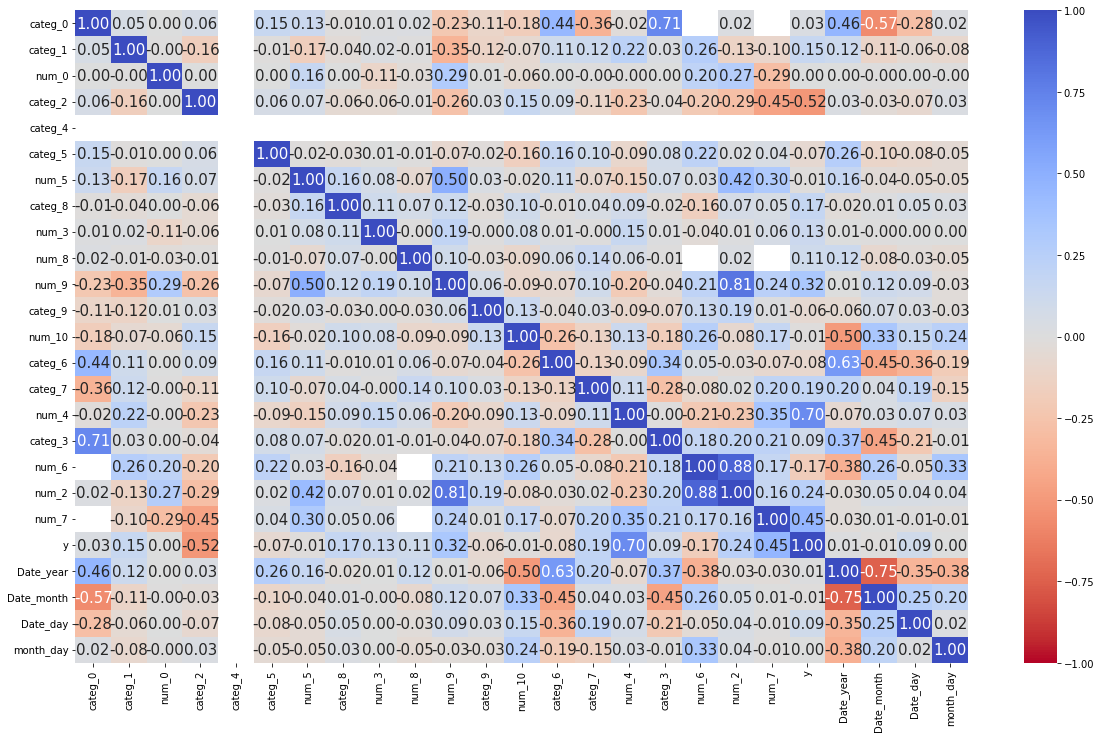

In [78]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, cmap="coolwarm_r",annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()

In [16]:
test_df["date_0"]=pd.to_datetime(test_df["date_0"])
test_df['Date_year'] =test_df["date_0"].dt.year
test_df['Date_month'] = test_df["date_0"].dt.month
test_df['Date_day'] = test_df["date_0"].dt.day
test_df.drop("date_0", axis=1, inplace=True)

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categ_0     15000 non-null  int64  
 1   categ_1     15000 non-null  int64  
 2   num_0       15000 non-null  int64  
 3   categ_2     15000 non-null  int64  
 4   categ_4     15000 non-null  int64  
 5   categ_5     15000 non-null  int64  
 6   categ_8     15000 non-null  int64  
 7   categ_9     15000 non-null  int64  
 8   num_10      14536 non-null  float64
 9   categ_6     15000 non-null  int64  
 10  categ_7     15000 non-null  int64  
 11  num_4       13237 non-null  float64
 12  categ_3     15000 non-null  int64  
 13  Date_year   15000 non-null  int64  
 14  Date_month  15000 non-null  int64  
 15  Date_day    15000 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.8 MB


# Mice

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)
imp_train_df=mice.fit_transform(train_df)
imp_train_df=pd.DataFrame(imp_train_df,columns=train_df.columns)

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imp_test_df=mice.fit_transform(test_df)
imp_test_df=pd.DataFrame(imp_test_df,columns=test_df.columns)

In [21]:
imp_train_df.isna().sum()

categ_0       0
categ_1       0
num_0         0
categ_2       0
categ_4       0
categ_5       0
categ_8       0
categ_9       0
num_10        0
categ_6       0
categ_7       0
num_4         0
categ_3       0
y             0
Date_year     0
Date_month    0
Date_day      0
dtype: int64

In [22]:
imp_train_df["mean"]=imp_train_df.mean(axis=1)
imp_train_df["count"]=imp_train_df.count(axis=1)
imp_train_df["std"]=imp_train_df.std(axis=1)
imp_train_df["min"]=imp_train_df.min(axis=1)
imp_train_df["max"]=imp_train_df.max(axis=1)
imp_train_df["kurt"]=imp_train_df.kurt(axis=1)
imp_train_df["skew"]=imp_train_df.skew(axis=1)
imp_train_df["q1"]=imp_train_df.quantile(q=0.1,axis=1)
imp_train_df["q2"]=imp_train_df.quantile(q=0.2,axis=1)
imp_train_df["q25"]=imp_train_df.quantile(q=0.25,axis=1)
imp_train_df["q3"]=imp_train_df.quantile(q=0.3,axis=1)
imp_train_df["q4"]=imp_train_df.quantile(q=0.4,axis=1)
imp_train_df["q5"]=imp_train_df.quantile(q=0.5,axis=1)
imp_train_df["q6"]=imp_train_df.quantile(q=0.6,axis=1)
imp_train_df["q7"]=imp_train_df.quantile(q=0.7,axis=1)
imp_train_df["q75"]=imp_train_df.quantile(q=0.75,axis=1)
imp_train_df["q8"]=imp_train_df.quantile(q=0.8,axis=1)
imp_train_df["q9"]=imp_train_df.quantile(q=0.9,axis=1)

In [23]:
imp_test_df["mean"]=imp_test_df.mean(axis=1)
imp_test_df["count"]=imp_test_df.count(axis=1)
imp_test_df["std"]=imp_test_df.std(axis=1)
imp_test_df["min"]=imp_test_df.min(axis=1)
imp_test_df["max"]=imp_test_df.max(axis=1)
imp_test_df["kurt"]=imp_test_df.kurt(axis=1)
imp_test_df["skew"]=imp_test_df.skew(axis=1)
imp_test_df["q1"]=imp_test_df.quantile(q=0.1,axis=1)
imp_test_df["q2"]=imp_test_df.quantile(q=0.2,axis=1)
imp_test_df["q25"]=imp_test_df.quantile(q=0.25,axis=1)
imp_test_df["q3"]=imp_test_df.quantile(q=0.3,axis=1)
imp_test_df["q4"]=imp_test_df.quantile(q=0.4,axis=1)
imp_test_df["q5"]=imp_test_df.quantile(q=0.5,axis=1)
imp_test_df["q6"]=imp_test_df.quantile(q=0.6,axis=1)
imp_test_df["q7"]=imp_test_df.quantile(q=0.7,axis=1)
imp_test_df["q75"]=imp_test_df.quantile(q=0.75,axis=1)
imp_test_df["q8"]=imp_test_df.quantile(q=0.8,axis=1)
imp_test_df["q9"]=imp_test_df.quantile(q=0.9,axis=1)

In [24]:
y_train=imp_train_df["y"]

In [25]:
imp_train_df=imp_train_df.drop("y",axis=1)

In [26]:
imp_train_df.shape, imp_test_df.shape

((45000, 34), (15000, 34))

# Scaling 

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(imp_train_df)
X_test = mms.transform(imp_test_df)


In [28]:
mms.fit_transform(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 4500. 22133. 11490. ... 32590. 23812. 26395.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.shape, X_train.shape

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.1)

****

# Modeling

**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(min_samples_split=15)
Rf.fit(xtrain, ytrain)
ypred=Rf.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

In [ ]:
mean_squared_error(ytest, ypred, squared=True)

In [ ]:
Rf.fit(xtest, ytest)
ypred=Rf.predict(xtest)

In [ ]:
mean_squared_error(ytest, ypred, squared=True)

In [ ]:
# y_pred1 = Rf.predict(x_test) 
# y_pred_original1 = mms.inverse_transform(y_pred1.reshape(-1,1))
# y_pred_original1=y_pred_original1.tolist()
# y_pred_original1=[i[0] for i in y_pred_original1]
# submission = pd.DataFrame({'_id': Id,'y_pred': y_pred_original1})
# submission.to_csv('submission0.csv', index=False)

****

**XGBRegressor : the best result**

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror')
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model,xtrain,ytrain, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MSE: %.8f (%53f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model.fit(xtrain, ytrain)
yhat = model.predict(xtest)

In [ ]:
mean_squared_error(ytest, yhat, squared=True)

In [ ]:
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test) 
y_pred_original4 = mms.inverse_transform(y_pred4.reshape(-1,1))


In [ ]:
y_pred_original4=y_pred_original4.tolist()
y_pred_original4=[i[0] for i in y_pred_original4]
submission = pd.DataFrame({'_id': Id,'y_pred': y_pred_original4})
submission.to_csv('submission1.csv', index=False)

****

**LGBMRegressor**

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model1 = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, xtrain, ytrain, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.5f (%.5f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model1 = LGBMRegressor()
model1.fit(xtrain, ytrain)
yhatt = model1.predict(xtest)
mean_squared_error(ytest, yhatt)

In [ ]:
# model1.fit(X_train, y_train)
# y_pred2 = model1.predict(X_test) 
# y_pred_original2 = mms.inverse_transform(y_pred2.reshape(-1,1))
# y_pred_original2=y_pred_original4.tolist()
# y_pred_original2=[i[0] for i in y_pred_original2]
# submission = pd.DataFrame({'_id	': Id,'y_pred': y_pred_original2})
# submission.to_csv('submission13.csv', index=False)

**GradientBoostingRegressor**

In [ ]:
from sklearn import  ensemble
params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, reg.predict(xtest))
mse

In [ ]:
# y_pred3 = reg.predict(X_test) 
# y_pred_original3 = mms.inverse_transform(y_pred3.reshape(-1,1))
# y_pred_original3=y_pred_original3.tolist()
# y_pred_original3=[i[0] for i in y_pred_original3]
# submission = pd.DataFrame({'_id': Id,'y_pred': y_pred_original3})
# submission.to_csv('submission14.csv', index=False)